In [1]:
from funcionalidades import backend 

In [2]:
#url = "https://www.cmnovalima.mg.gov.br/wp-content/uploads/2020/09/12ata-r.e.-virtual-setembro-10-09-2020.pdf"
#sem quorum.
#url ="https://www.cmnovalima.mg.gov.br/wp-content/uploads/2020/08/07ataa-r.e.-virtual-agosto-06-08-2020.pdf"
#sem quorum.
#url ="https://www.cmnovalima.mg.gov.br/wp-content/uploads/2020/09/09ataa-r.e.-virtual-agosto-20-08-2020-3.pdf"
#url = "https://www.cmnovalima.mg.gov.br/wp-content/uploads/2019/10/ata-r.o.-15-10-19.pdf"
#########################################################################################################
#url ="https://www.cmnovalima.mg.gov.br/wp-content/uploads/2019/02/ata-r.soleneordinaria-05-02-19.pdf"
#url = "https://www.cmnovalima.mg.gov.br/wp-content/uploads/2019/02/ata-r.o.-12-02-19.pdf"
#url = "https://www.cmnovalima.mg.gov.br/wp-content/uploads/2019/03/ata-r.o.-19-02-19.pdf"
####url = "https://www.cmnovalima.mg.gov.br/wp-content/uploads/2019/03/ata-r.o.-26-02-19.pdf"
#url = "https://www.cmnovalima.mg.gov.br/wp-content/uploads/2019/03/ata-r.o.-12-03-19.pdf"
#url = "https://www.cmnovalima.mg.gov.br/wp-content/uploads/2019/03/ata-r.extraordinaria-15-03-19.pdf"
#url = "https://www.cmnovalima.mg.gov.br/wp-content/uploads/2019/04/ata-r.o.-19-03-19.pdf"
#url = "https://www.cmnovalima.mg.gov.br/wp-content/uploads/2019/04/ata-r.o.-26-03-19.pdf"
#url = "https://www.cmnovalima.mg.gov.br/wp-content/uploads/2019/04/ata-r.o.-02-04-19.pdf"
#url = "https://www.cmnovalima.mg.gov.br/wp-content/uploads/2019/04/ata-r.o.-09-04-19.pdf"
###
#url ="https://www.cmnovalima.mg.gov.br/wp-content/uploads/2019/04/ata-r.o.-16-04-19.pdf"
#url = "https://www.cmnovalima.mg.gov.br/wp-content/uploads/2019/05/ata-r.o.-23-04-19.pdf"
#url = "https://www.cmnovalima.mg.gov.br/wp-content/uploads/2019/05/ata-r.o.-30-04-19.pdf"
#url = "https://www.cmnovalima.mg.gov.br/wp-content/uploads/2019/05/ata-r.o.-07-05-19.pdf"
#url = "https://www.cmnovalima.mg.gov.br/wp-content/uploads/2019/05/ata-r.o.-14-05-19-1.pdf"
#url = "https://www.cmnovalima.mg.gov.br/wp-content/uploads/2019/05/mae-destaque-nova-limense-16-05-2019-3.pdf"
#url = "https://www.cmnovalima.mg.gov.br/wp-content/uploads/2019/06/ata-r.o.-21-05-19-1.pdf"
#url = "https://www.cmnovalima.mg.gov.br/wp-content/uploads/2019/06/ata-r.o.-28-05-19-1.pdf"
#url = "https://www.cmnovalima.mg.gov.br/wp-content/uploads/2019/06/ata-r.o.-04-06-19.pdf"
#url = "https://www.cmnovalima.mg.gov.br/wp-content/uploads/2019/06/ata-r.o.-11-06-19.pdf"
#url = "https://www.cmnovalima.mg.gov.br/wp-content/uploads/2019/07/ata-r.o.-18-06-19.pdf"
url = "https://www.cmnovalima.mg.gov.br/wp-content/uploads/2019/07/ata-r.o.-25-06-19.pdf"
#url = "https://www.cmnovalima.mg.gov.br/wp-content/uploads/2019/08/ata-r.o.-02-07-19.pdf"


#"Ata: ['-r.o.-25-06-19.pdf'] NumeroPaginas: 26"       
#url = "https://www.cmnovalima.mg.gov.br/wp-content/uploads/2019/07/ata-r.o.-25-06-19.pdf"
    
    
#"Ata: ['-r.o.-28-05-19-1.pdf'] NumeroPaginas: 28"
#url = "https://www.cmnovalima.mg.gov.br/wp-content/uploads/2019/06/ata-r.o.-28-05-19-1.pdf"


#"Ata: ['-r.o.-23-04-19.pdf'] NumeroPaginas: 26"
#url = "https://www.cmnovalima.mg.gov.br/wp-content/uploads/2019/05/ata-r.o.-23-04-19.pdf" 
    
    
#"Ata: ['-r.o.-11-06-19.pdf'] NumeroPaginas: 1"
#url = "https://www.cmnovalima.mg.gov.br/wp-content/uploads/2019/06/ata-r.o.-11-06-19.pdf"
    
#"Ata: ['-r.o.-02-04-19.pdf'] NumeroPaginas: 1"
#url= "https://www.cmnovalima.mg.gov.br/wp-content/uploads/2019/04/ata-r.o.-02-04-19.pdf"    
    
#"Ata: ['-r.o.-12-02-19.pdf'] NumeroPaginas: 1
#url = "https://www.cmnovalima.mg.gov.br/wp-content/uploads/2019/02/ata-r.o.-12-02-19.pdf"
    


#### Obteção de Dados

In [3]:
text = backend.extrair_texto_pdf(url)

#### Nuvem de palavras 
#### Sem filtro

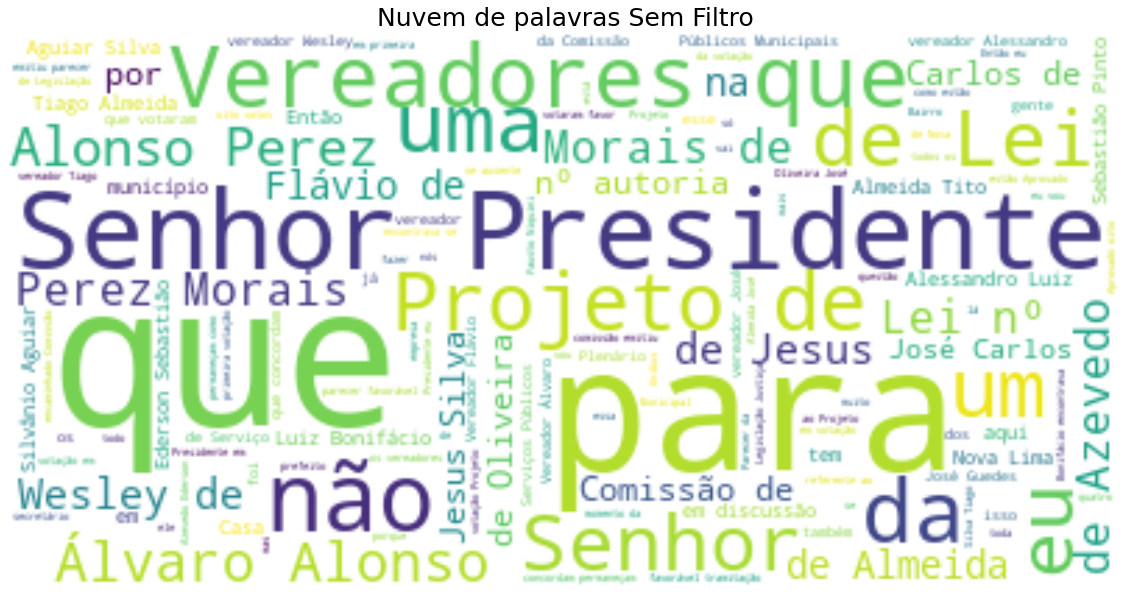

In [4]:
backend.nuvem_palavras(text,  'Nuvem de palavras Sem Filtro')

#### Filtragem de palavras

In [5]:
resultado = backend.filtos(text)

#### Tabulação de dados 

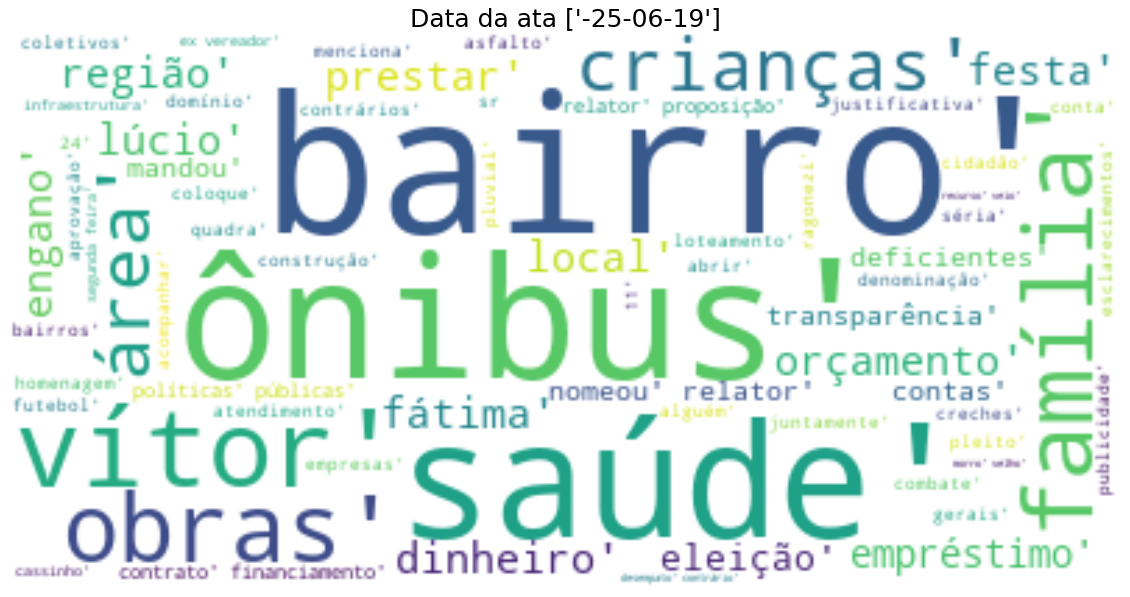

Data da reunião: ['-25-06-19']
Número de Vereadores presentes: 10 
Lista com os Vereadores Presentes: ['Alessandro Luiz Bonifácio', 'Ederson Sebastião Pinto', 'Fausto Niquini Ferreira', 'Flávio de Almeida', 'José Carlos de Oliveira', 'José Geraldo Guedes', 'Silvânio Aguiar Silva', 'Tiago Tito', 'Wesley de Jesus Silva', 'Álvaro Alonso Perez Morais de Azevedo']
Houve Reunião: Sim
Palavras mais frequêntes:['bairro', 'ônibus', 'saúde', 'vítor', 'família']


NoSuchElementException: Message: Unable to locate element: //p[@class='significado textonovo']


In [6]:
backend.nuvem_palavras(resultado,  f"Data da ata {str(backend.data_reuniao(url))}")
print(f"Data da reunião: {str(backend.data_reuniao(url))}")
backend.dados_ata(text)
pesquisar = backend.palavras_frequentes(resultado)
print(f"Palavras mais frequêntes:{pesquisar}")

backend.diconario(pesquisar)